### Student Performance Indicator

Problem Statement-


This project understands how the students performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test Preparation course.

#### Import Dataset and Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the dataset
df=pd.read_csv('StudentsPerformance.csv')

In [3]:
# Top 5 Records
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

### Dataset information

  gender : sex of students -> (Male/female)
  
  race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
  
  parental level of education : parents' final education ->(bachelor's degree,some college,master's     degree,associate's degree,high school)
  
  lunch : having lunch before test (standard or free/reduced)
  
  test preparation course : complete or not complete before test
  
  math score
  
  reading score
  
  writing score

#### Check Missing Values:

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the dataset.

#### Check Duplicates:

In [6]:
df.duplicated().sum()

0

There are no duplicates values in the datset.

#### Check datatypes:

In [7]:
# df.dtypes  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Checking the number of unique values in the each columns

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### Check statistics of dataset:

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights:

From above description of numerical data, all means are very close to each other.

All standard deviations are also close.

While there is minimum score 0 for math, and for writting minimum is much higher=10 and for reading much higher=17

#### Exploring the data:

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
# Print all Categories present in the categorical variable:

print("Categories in 'gender' variables:", df['gender'].unique())
print("Categories in 'race/ethnicity' variables:", df['race/ethnicity'].unique())
print("Categories in 'parental level of education' variables:", df['parental level of education'].unique())
print("Categories in 'lunch' variables:", df['lunch'].unique())
print("Categories in 'test preparation course' variables:", df['test preparation course'].unique())

Categories in 'gender' variables: ['female' 'male']
Categories in 'race/ethnicity' variables: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variables: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variables: ['standard' 'free/reduced']
Categories in 'test preparation course' variables: ['none' 'completed']


In [12]:
# Define numerical and categorical columns:

numeric_features= [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features= [feature for feature in df.columns if df[feature].dtype == 'O']

# Print Columns:
print("We have {} numeric_feature: {}".format(len(numeric_features), numeric_features))
print("We have {} categorical_features: {}".format(len(categorical_features), categorical_features))

We have 3 numeric_feature: ['math score', 'reading score', 'writing score']
We have 5 categorical_features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Now, we create new columns: Total Score and Average Score

In [14]:
df['total score']= df['math score'] + df['reading score'] + df['writing score']
df['Average score']= df['total score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,Average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full_score= df[df['reading score']==100]['Average score'].count()
writing_full_score= df[df['writing score']==100]["Average score"].count()
math_full_score= df[df['math score']==100]['Average score'].count()

In [16]:
print(f'Number of Students with full score in Math: {math_full_score}')
print(f'Number of Students with full score in Reading: {reading_full_score}')
print(f'Number of Students with full score in Writing: {writing_full_score}')
    

Number of Students with full score in Math: 7
Number of Students with full score in Reading: 17
Number of Students with full score in Writing: 14


In [17]:
reading_less_20= df[df['reading score']<=20]['Average score'].count()
writing_less_20= df[df['writing score']<=20]['Average score'].count()
math_less_20= df[df['math score']<=20]['Average score'].count()

In [18]:
print(f'Number of Students with less than 20 marks in Math: {math_less_20}')
print(f'Number of Students with less than 20 marks in Reading: {reading_less_20}')
print(f'Number of Students with less than 20 marks in Writing: {writing_less_20}')

Number of Students with less than 20 marks in Math: 4
Number of Students with less than 20 marks in Reading: 1
Number of Students with less than 20 marks in Writing: 3


Insights:

From above values we get students has performed the worst in Maths.

Best performance is in Reading Section.

#### Exploring Data (Visualization):

#### Visualize average score distribution to make some conclusion.
    Histogram
    Kernel Distribution Function (KDE)

### Histogram & KDE

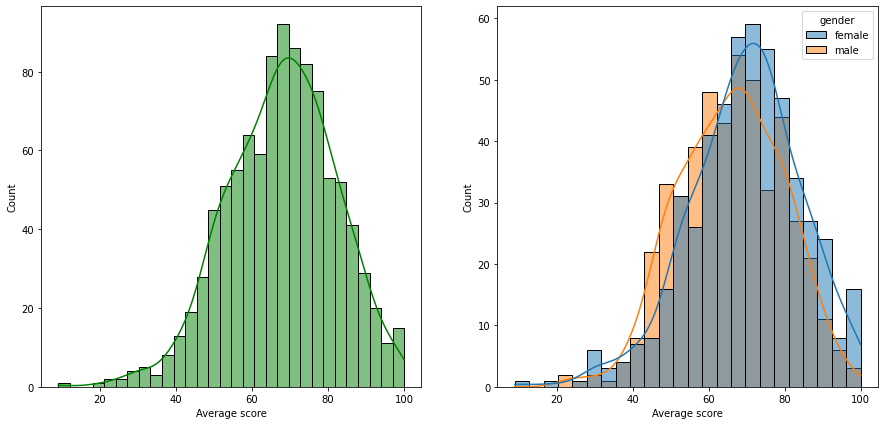

In [19]:
fig, axs= plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='Average score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Average score', kde=True, hue='gender')
plt.show()

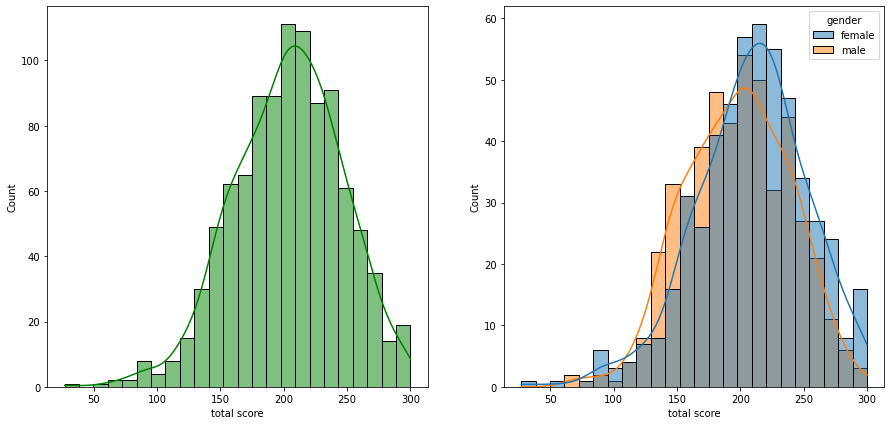

In [20]:
fig, axs= plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total score', kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender')
plt.show()

Insights:

Female students tend to perform well than male students.

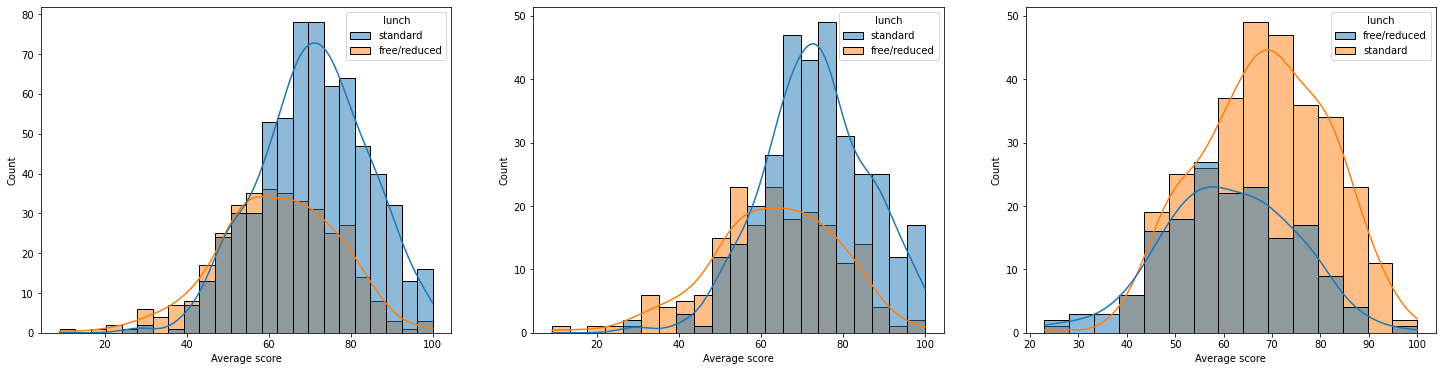

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='Average score', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='Average score',kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='Average score', kde=True, hue='lunch')
plt.show()

Insights:

   Standard lunch helps perform well in exams.
   Standard lunch helps perform well in exams be it a male or a female.

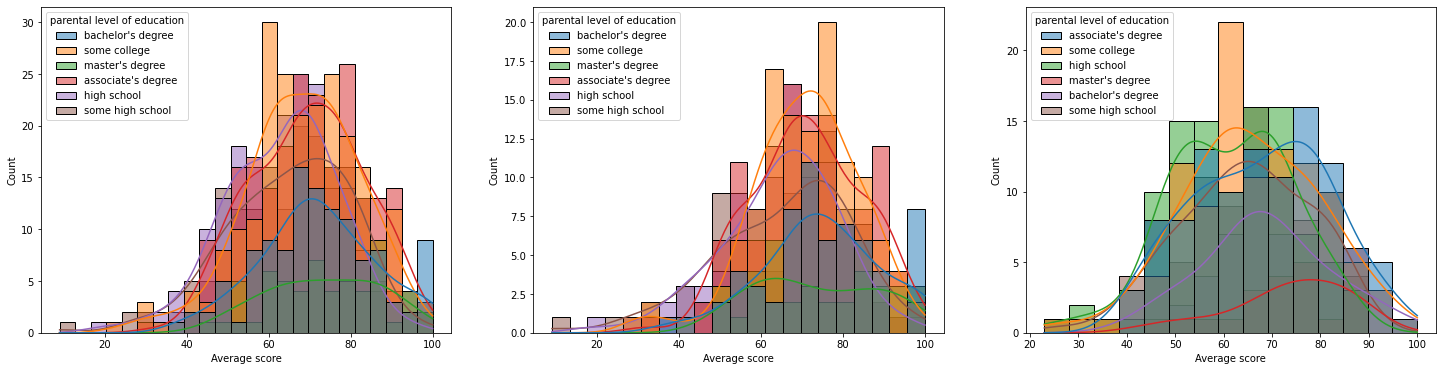

In [22]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
ax= sns.histplot(data=df, x='Average score', kde=True, hue='parental level of education')
plt.subplot(132)
ax= sns.histplot(data=df[df.gender=='female'], x='Average score', kde=True, hue='parental level of education')
plt.subplot(133)
ax= sns.histplot(data=df[df.gender=='male'], x='Average score', kde=True, hue='parental level of education')
plt.show()

Insights:

In general parent's education don't help student well in exam.

2nd plot we can see there is no effect of parent's education on female students.

3rd plot show that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam.

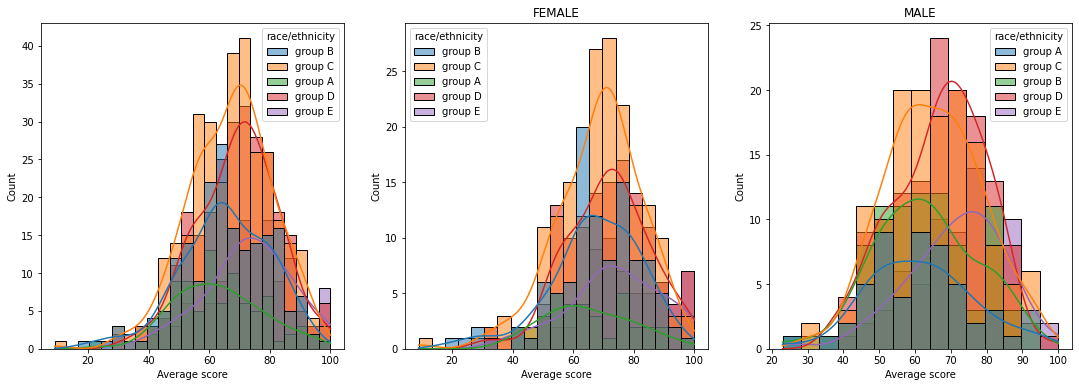

In [23]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='Average score', kde=True, hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='Average score', kde=True, hue='race/ethnicity')
plt.title('FEMALE')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='Average score', kde=True, hue='race/ethnicity')
plt.title('MALE')
plt.show()

Insights:

Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.

#### Maximum score of students in all three subjects:

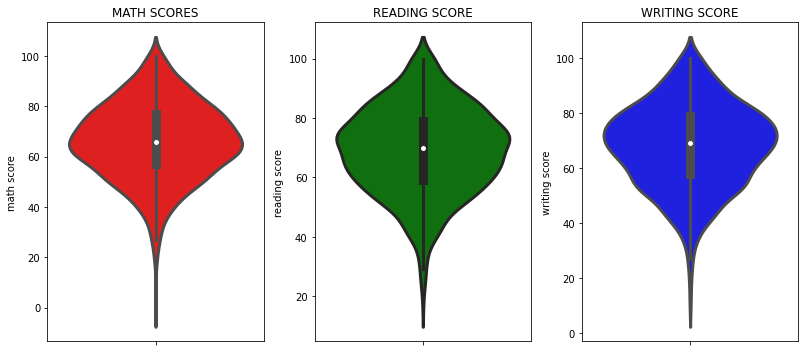

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(141)
plt.title('MATH SCORES')
sns.violinplot(y='math score', data=df, color='r', linewidth=3)
plt.subplot(142)
plt.title('READING SCORE')
sns.violinplot(y='reading score', data=df, color='g', linewidth=3)
plt.subplot(143)
plt.title('WRITING SCORE')
sns.violinplot(y='writing score', data=df, color='b', linewidth=3)
plt.tight_layout()
plt.show()

Insights:

From the above three violin plot its clearily visible that most of the students score in between 60-80 in MATHS whereas in READING and WRITING most of the score from 50-80.

In [25]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total score', 'Average score'],
      dtype='object')

### Number of Ethnicity by groups:

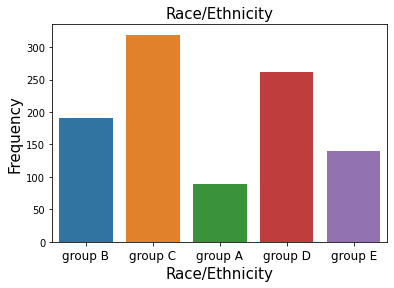

In [26]:

sns.countplot(x='race/ethnicity', data=df)
plt.xlabel('Race/Ethnicity', fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Race/Ethnicity',fontsize=15)
plt.xticks(fontsize=12)
plt.show()

Group C has more ethnicity than other groups.

### Gender wise parental level of education:

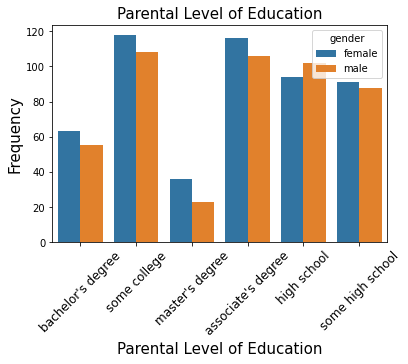

In [27]:
sns.countplot(x='parental level of education', hue='gender', data=df)
plt.title('Parental Level of Education', fontsize=15)
plt.xlabel('Parental Level of Education', fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(rotation=45,fontsize=12)
plt.show()

### Having lunch before test:

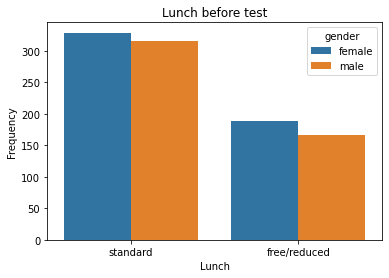

In [28]:
sns.countplot(x='lunch', hue='gender', data=df)
plt.title('Lunch before test')
plt.xlabel('Lunch')
plt.ylabel('Frequency')
plt.show()


Students having lunch before test perform well.

### Test preparation course before test:

<AxesSubplot:xlabel='test preparation course', ylabel='count'>

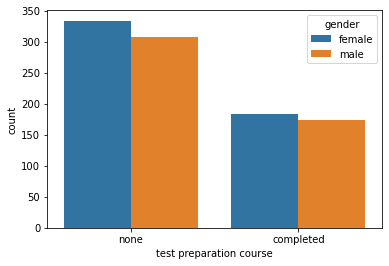

In [29]:
sns.countplot(x='test preparation course', hue='gender', data=df)

### Number of Students scored in Maths:

Less number of students has completed test preparation course.

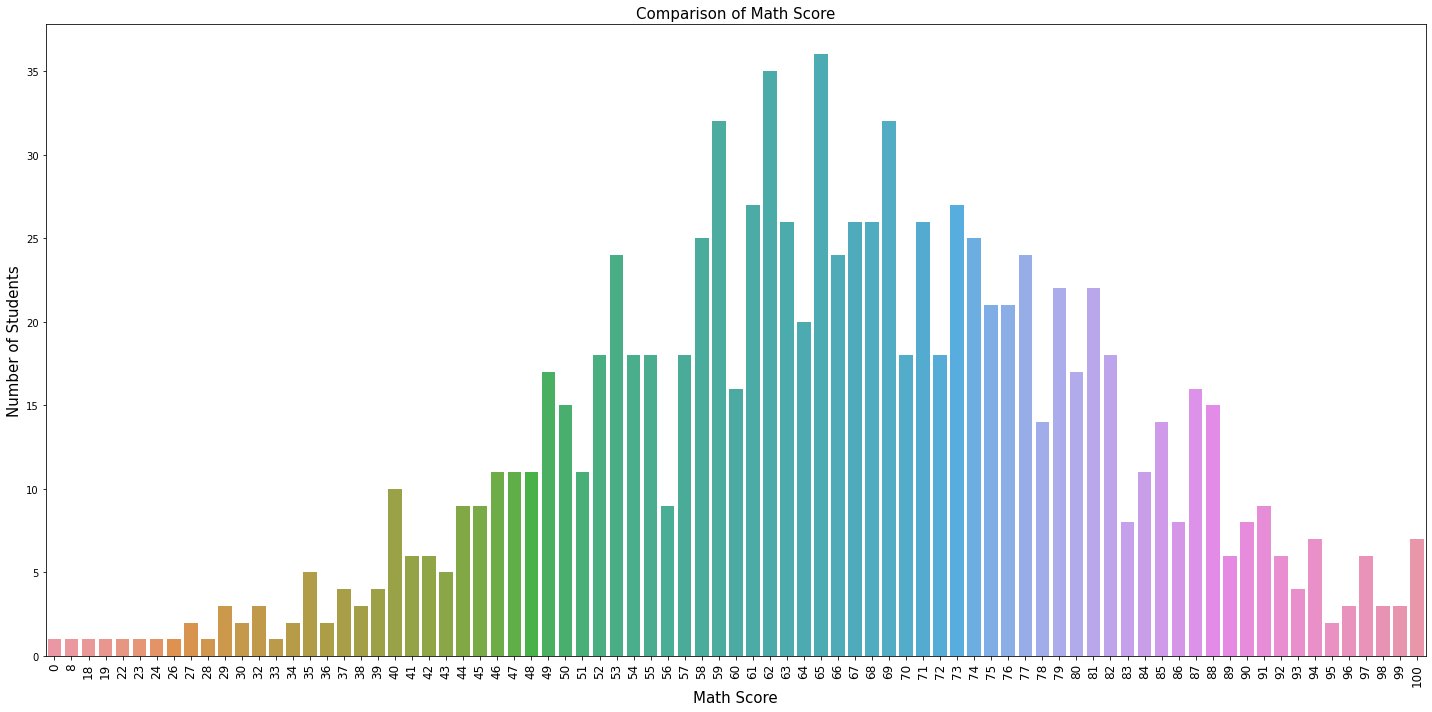

In [30]:
plt.figure(figsize=(20,10))
sns.countplot(x='math score', data=df)
plt.xlabel('Math Score', fontsize=15)
plt.ylabel('Number of Students', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.title('Comparison of Math Score', fontsize=15)
plt.tight_layout()
plt.show()

Here we can see, maximum number of students has scored 65 in maths.

### Number of Students scored in Reading:

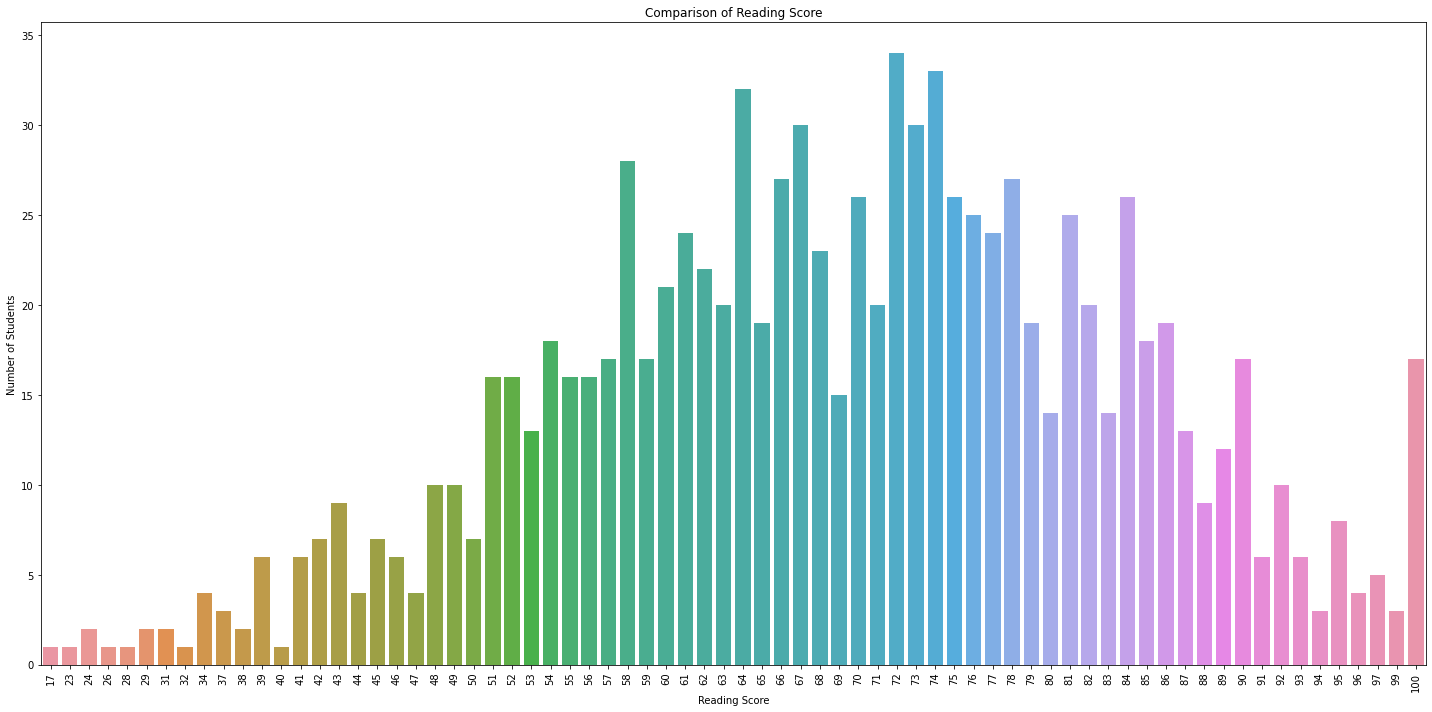

In [31]:
plt.figure(figsize=(20,10))
sns.countplot(x='reading score', data=df)
plt.xlabel('Reading Score')
plt.ylabel('Number of Students')
plt.xticks(rotation=90)
plt.title('Comparison of Reading Score')
plt.tight_layout()
plt.show()

Here we can see, maximum number of students has scored 72 in Reading.

### Number of Students scored in Writing:

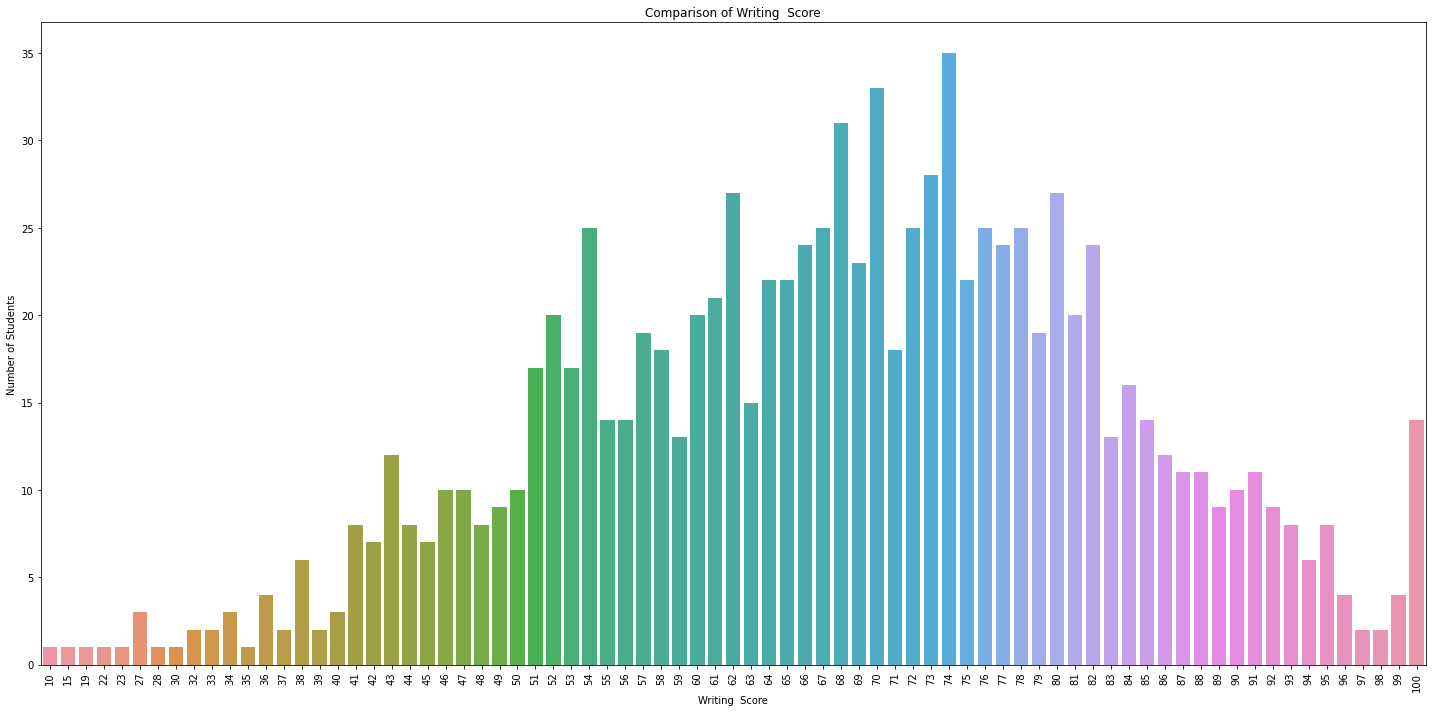

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(x='writing score', data=df)
plt.xlabel('Writing  Score')
plt.ylabel('Number of Students')
plt.xticks(rotation=90)
plt.title('Comparison of Writing  Score')
plt.tight_layout()
plt.show()

Here we can see, maximum number of students has scored 74 in Writing.

In [33]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,Average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### Criterion for passing grade:

In [34]:
def result(TS,MS,WS,RS):
    if (TS>120 and MS>40 and WS>40 and RS>40):
        return 'Pass'
    else:
        return 'Fail'

In [35]:
df['Pass/Fail']=df.apply(lambda x: result(x['total score'],x['math score'],x['writing score'],x['reading score']),axis = 1 ) 

In [36]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,Average score,Pass/Fail
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,Pass
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,Pass
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,Pass
4,male,group C,some college,standard,none,76,78,75,229,76.333333,Pass


In [37]:
df['Pass/Fail'].value_counts()

Pass    939
Fail     61
Name: Pass/Fail, dtype: int64

<AxesSubplot:xlabel='Pass/Fail', ylabel='count'>

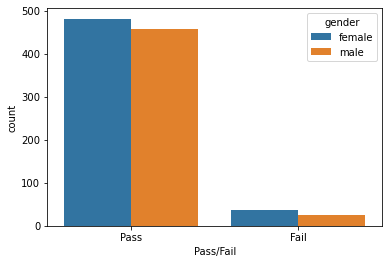

In [38]:
sns.countplot(x='Pass/Fail',hue='gender', data=df)

More number of female students pass than male students.

### Comparison of Total Score:

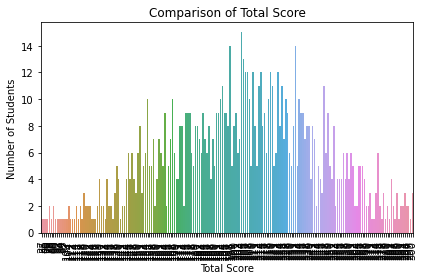

In [39]:
sns.countplot(x='total score', data=df)
plt.xlabel('Total Score')
plt.ylabel('Number of Students')
plt.title('Comparison of Total Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Grading of marks

          0  - 40 marks : grade E
          41 - 60 marks : grade D
          60 - 70 marks : grade C
          70 - 80 marks : grade B
          80 - 90 marks : grade A
          90 - 100 marks : grade O

In [40]:
def getgrade(AvgScore, status):
    if status=='Fail':
        return 'E'
    elif (AvgScore>=90):
        return 'O'
    elif (AvgScore>=80):
        return 'A'
    elif (AvgScore>=70):
        return 'B'
    elif (AvgScore>=60):
        return "C"
    elif (AvgScore>=40):
        return 'D'
    else:
        return 'E'

In [41]:
df['grades']= df.apply(lambda x: getgrade(x['Average score'], x['Pass/Fail']), axis=1)

In [42]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,Average score,Pass/Fail,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,Pass,B
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,Pass,A
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,Pass,O
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,Pass,D
4,male,group C,some college,standard,none,76,78,75,229,76.333333,Pass,B


In [43]:
df['grades'].value_counts()

B    261
C    256
D    224
A    146
E     61
O     52
Name: grades, dtype: int64

### Grade wise Number of Students:

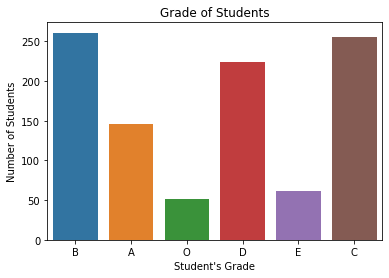

In [44]:
sns.countplot(x='grades', data=df)
plt.title('Grade of Students')
plt.xlabel("Student's Grade")
plt.ylabel('Number of Students')
plt.show()

In this visual, We can see highest number of students got Grade B & less number of students got Grade O.

In [45]:
     #END#